<a href="https://colab.research.google.com/github/kvishnu78/ML-DM-Lab/blob/main/Clustering_Wine_Quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upoading dataset

In [1]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [2]:
import pandas as pd #to read from excel
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split#to split training and testing sample

from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Loading the dataset

In [3]:
dataset=pd.read_csv("winequalityN.csv")#loading the dataset
dataset.isnull().sum()#checking for null values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
dataset.update(dataset.fillna(dataset.mean()))#removing the numerical null values using mean value, and fillna is used to fill empty values
dataset.isnull().sum()#rechecking number of empty cells

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
features=['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
x=dataset[features]
x1=dataset[features]
y=dataset['quality'] 
y1=dataset['quality'] 
print(x)

      fixed acidity  ...  total sulfur dioxide
0               7.0  ...                 170.0
1               6.3  ...                 132.0
2               8.1  ...                  97.0
3               7.2  ...                 186.0
4               7.2  ...                 186.0
...             ...  ...                   ...
6492            6.2  ...                  44.0
6493            5.9  ...                  51.0
6494            6.3  ...                  40.0
6495            5.9  ...                  44.0
6496            6.0  ...                  42.0

[6497 rows x 11 columns]


Oversampling

In [6]:
warnings.filterwarnings('ignore')
# to supress the depreciated function usage warnings

counter=Counter(y)
print("Before:",counter)
smt=SMOTE(k_neighbors=2,sampling_strategy="all")
x,y=smt.fit_resample(x,y)
counter=Counter(y)
print("After:",counter)

Before: Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
After: Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})


Dimensionality Reduction

A part of the projected dataset:
          PC1        PC2
0  58.122132  -2.906684
1  12.197060 -20.739571
2 -16.469984   4.473117
3  73.635899  -5.108455
4  73.635899  -5.108455 



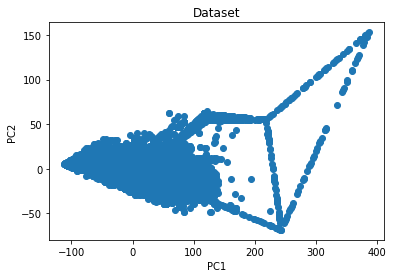

In [7]:
pca=PCA(n_components=2)
new_x=pca.fit_transform(x)
priniciple_components=pd.DataFrame(data=new_x,columns=["PC1","PC2"])
x=priniciple_components
print("A part of the projected dataset:\n",x.head(5),"\n")
fig,ax=plt.subplots()
ax.scatter(x['PC1'],x['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dataset")
plt.show()
print("\n")


Swapping the order in which dimensionality reduction and oversampling are done-Minor change noticed

Before: Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})
After: Counter({6: 2836, 5: 2836, 7: 2836, 8: 2836, 4: 2836, 3: 2836, 9: 2836})
A part of the projected dataset:
          PC1        PC2
0  56.718595   1.805834
1  11.848669 -19.905123
2 -18.288446   3.848274
3  72.226040  -0.178224
4  72.226040  -0.178224 



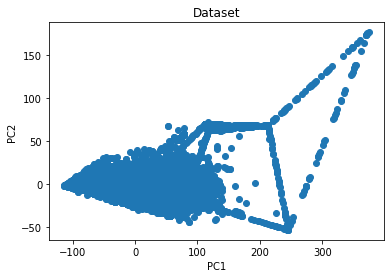

In [8]:
# dimensionality reduction
pca=PCA(n_components=2)
new_x=pca.fit_transform(x1)
priniciple_components=pd.DataFrame(data=new_x,columns=["PC1","PC2"])
x1=priniciple_components


# Oversampling
warnings.filterwarnings('ignore')
# to supress the depreciated function usage warnings

counter=Counter(y1)
print("Before:",counter)
smt=SMOTE(k_neighbors=2,sampling_strategy="all")
x1,y1=smt.fit_resample(x1,y1)
counter=Counter(y1)
print("After:",counter)
x1=pd.DataFrame(data=x1,columns=["PC1","PC2"])
print("A part of the projected dataset:\n",x1.head(5),"\n")
fig,ax=plt.subplots()
ax.scatter(x1['PC1'],x1['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dataset")
plt.show()
print("\n")

Standization

In [9]:
S=StandardScaler()
x=S.fit_transform(x)

END OF PREPROCESSING

K Means 


In [10]:
def plot_dataset(new_dataset,k):
  fig,ax=plt.subplots()
  colors={0:'red',1:'violet',2:'pink',3:'black',4:'blue',5:'yellow',6:'green',7:'brown',8:'indigo',9:'orange'}
  ax.scatter(new_dataset['PC1'],new_dataset['PC2'],c=new_dataset['cluster'].map(colors))
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  t="Dataset After K means clustering with k="+str(k)
  plt.title(t)
  plt.show()
  print("\n")

K means with K= 2
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        1
1  0.196118 -1.365614        1
2 -0.264824  0.294536        0
3  1.184004 -0.336370        1
4  1.184004 -0.336370        1

 Dataset after clustering:


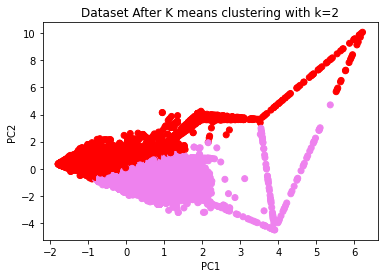




End of K= 2 iteration


------------------------------------------------


K means with K= 3
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        0
1  0.196118 -1.365614        0
2 -0.264824  0.294536        1
3  1.184004 -0.336370        0
4  1.184004 -0.336370        0

 Dataset after clustering:


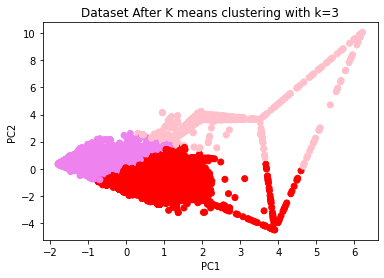




End of K= 3 iteration


------------------------------------------------


K means with K= 4
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        2
1  0.196118 -1.365614        1
2 -0.264824  0.294536        2
3  1.184004 -0.336370        1
4  1.184004 -0.336370        1

 Dataset after clustering:


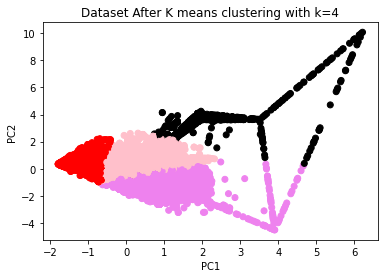




End of K= 4 iteration


------------------------------------------------


K means with K= 5
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        4
1  0.196118 -1.365614        4
2 -0.264824  0.294536        0
3  1.184004 -0.336370        4
4  1.184004 -0.336370        4

 Dataset after clustering:


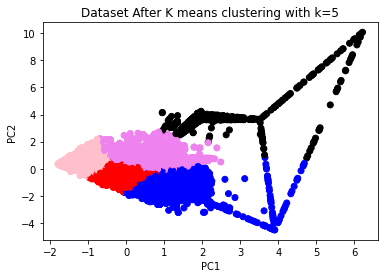




End of K= 5 iteration


------------------------------------------------


K means with K= 6
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        4
1  0.196118 -1.365614        4
2 -0.264824  0.294536        0
3  1.184004 -0.336370        4
4  1.184004 -0.336370        4

 Dataset after clustering:


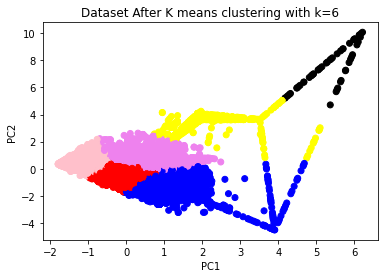




End of K= 6 iteration


------------------------------------------------


K means with K= 7
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        6
1  0.196118 -1.365614        4
2 -0.264824  0.294536        1
3  1.184004 -0.336370        6
4  1.184004 -0.336370        6

 Dataset after clustering:


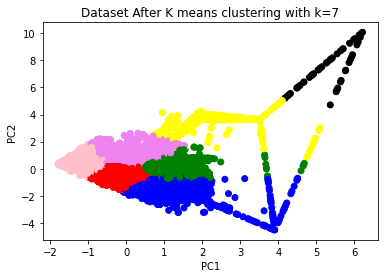




End of K= 7 iteration


------------------------------------------------


K means with K= 8
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        2
1  0.196118 -1.365614        0
2 -0.264824  0.294536        7
3  1.184004 -0.336370        2
4  1.184004 -0.336370        2

 Dataset after clustering:


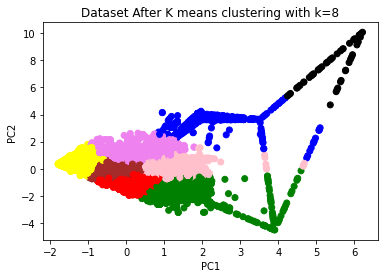




End of K= 8 iteration


------------------------------------------------


K means with K= 9
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        4
1  0.196118 -1.365614        1
2 -0.264824  0.294536        6
3  1.184004 -0.336370        4
4  1.184004 -0.336370        4

 Dataset after clustering:


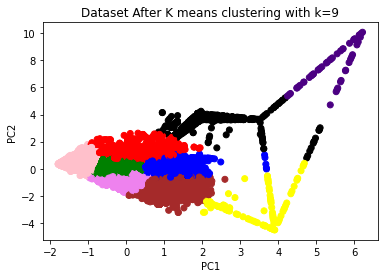




End of K= 9 iteration


------------------------------------------------


K means with K= 10
model= KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

After clustering the dataset:
         PC1       PC2  cluster
0  0.934555 -0.191393        7
1  0.196118 -1.365614        8
2 -0.264824  0.294536        0
3  1.184004 -0.336370        7
4  1.184004 -0.336370        7

 Dataset after clustering:


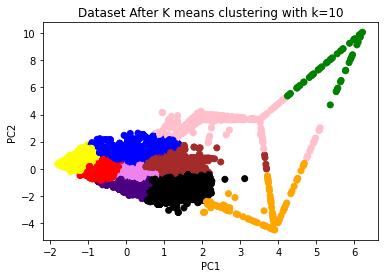




End of K= 10 iteration


------------------------------------------------




In [11]:
k_range=range(2,11)
sse=[]
for k in k_range:
  print("K means with K=",k)
  k_means=KMeans(n_clusters=k,random_state=42)
  # making a deterministicc randomness for centeriod intialization, randum number=42
  print("model=",k_means)
  y_pred=k_means.fit_predict(x)
  sse.append(k_means.inertia_)
  pc=pd.DataFrame(data=x,columns=["PC1","PC2"])
  cluster=pd.DataFrame(data=y_pred,columns=["cluster"])
  ds=pd.concat([pc,cluster],axis=1)
  print("\nAfter clustering the dataset:\n",ds.head(5))
  print("\n Dataset after clustering:")
  plot_dataset(ds,k)


  print("\nEnd of K=",k,"iteration\n\n")
  print("------------------------------------------------\n\n")


ELBOW Curve

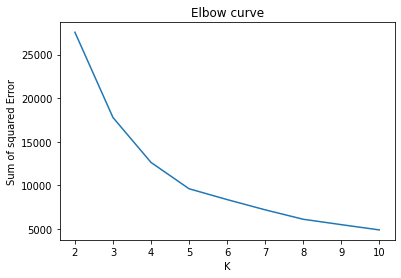

In [12]:
plt.xlabel("K")
plt.ylabel("Sum of squared Error")
plt.title("Elbow curve")
plt.plot(k_range,sse)

DBSCAN


DBSCAN for eps= 0.2


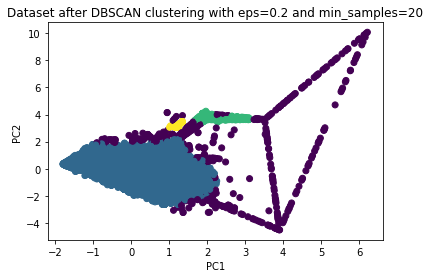


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 429
--------------------------------------------------------


DBSCAN for eps= 0.21


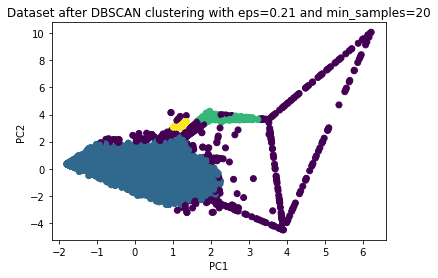


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 401
--------------------------------------------------------


DBSCAN for eps= 0.22


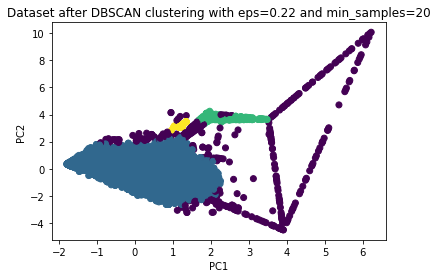


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 380
--------------------------------------------------------


DBSCAN for eps= 0.23


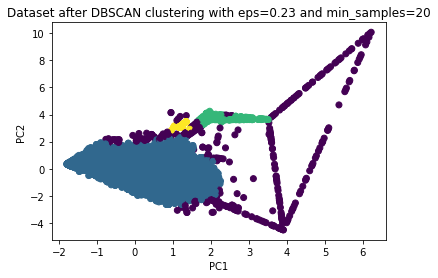


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 355
--------------------------------------------------------


DBSCAN for eps= 0.24


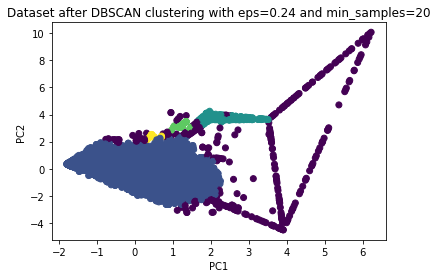


labels of the clusters generated(-1 indicates noise): {0, 1, 2, 3, -1}


Number of clusters: 4
Number of Noisy points: 325
--------------------------------------------------------


DBSCAN for eps= 0.25


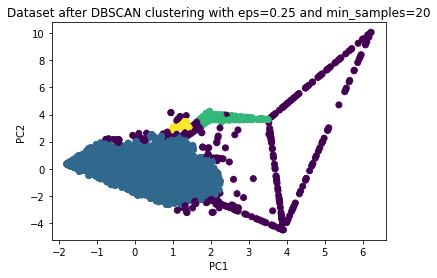


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 318
--------------------------------------------------------


DBSCAN for eps= 0.26


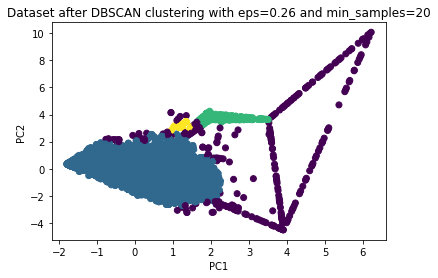


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 294
--------------------------------------------------------


DBSCAN for eps= 0.27


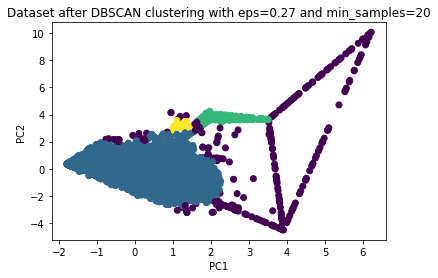


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 275
--------------------------------------------------------


DBSCAN for eps= 0.28


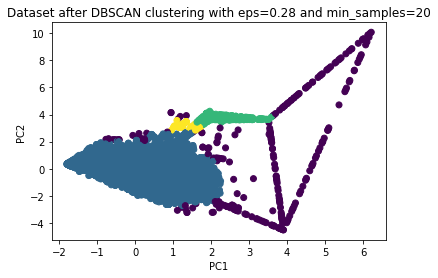


labels of the clusters generated(-1 indicates noise): {0, 1, 2, -1}


Number of clusters: 3
Number of Noisy points: 254
--------------------------------------------------------




In [15]:
epsrange=np.arange(0.2,.29,0.01)
# Say min_samples is 20
for i in epsrange:
  print("DBSCAN for eps=",round(i,3))
  dbscan=DBSCAN(eps=i,min_samples=20)
  ypred=dbscan.fit_predict(x)
  pc_=pd.DataFrame(data=x,columns=["PC1","PC2"])
  fig,ax=plt.subplots()
  ax.scatter(pc_['PC1'],pc_['PC2'],c=ypred)
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  t="Dataset after DBSCAN clustering with eps="+str(round(i,3))+" and min_samples=20"
  plt.title(t)
  plt.show()

  labels=dbscan.labels_
  labelset=set(labels)
  print("\nlabels of the clusters generated(-1 indicates noise):",labelset)
  numClusters=0
  numNoise=0
  for i in labelset:
    if i!=-1:
        numClusters=numClusters+1

  for i in labels:
    if i==-1:
        numNoise=numNoise+1

  print("\n\nNumber of clusters:",numClusters)
  print("Number of Noisy points:",numNoise)
  print("--------------------------------------------------------\n\n")
  